In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import missingno as msno

In [12]:
df = pd.read_csv('../../data/dataset.csv')
print(df.shape)
df.head()

(177010, 27)


,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,Competition,MarketValue,name,age,Days_injured,international,Liga,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded
0,10,2004,45,1.60,17,11,4,0,0,0,110.0,3244,86,Bundesliga,12000000,Miroslav Klose,26.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
1,690,2004,41,1.80,19,14,5,0,0,0,136.0,3001,86,Bundesliga,7500000,Ivan Klasnic,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
2,4316,2004,35,1.74,1,0,2,0,0,0,478.0,2985,86,Bundesliga,4500000,Petri Pasanen,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
3,4403,2004,28,1.82,3,6,4,0,0,0,130.0,1898,86,Bundesliga,4000000,Daniel Jensen,25.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
4,10,2005,40,1.70,31,17,5,1,0,1,115.0,3313,86,Bundesliga,30000000,Miroslav Klose,27.0,0.0,1,Bundesliga,First Tier,21,7,6,70,79,37


In [13]:
df = df.query('Season < 2022')

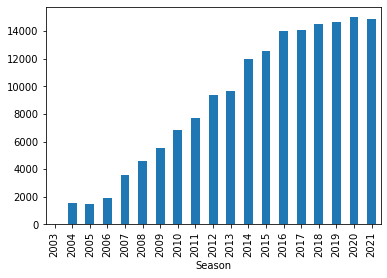

In [14]:
# show how entries change with Season
df.groupby('Season')['Season'].count().plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Season'>

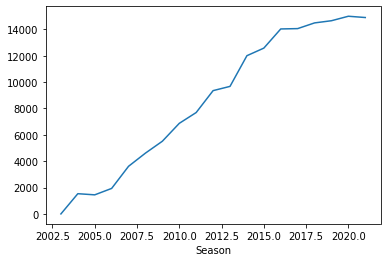

In [15]:
ss = df.groupby('Season')['Season'].count()
sns.lineplot(x=ss.index, y=ss.values, )

In [58]:
# show how many unique player_ids have marketvalue < 0.1
df[df['MarketValue'] < 0.1]['Player_id'].nunique()


4856

In [59]:
df = df.query('MarketValue > 0.1')
df.head()

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played,Club_id,Competition,MarketValue,name,age,Days_injured,international,Liga,Liga_level,W,D,L,Points,Goales_scored,Goales_conceded
0,10,2004,45,1.60,17,11,4,0,0,0,110.0,3244,86,Bundesliga,12000000,Miroslav Klose,26.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
1,690,2004,41,1.80,19,14,5,0,0,0,136.0,3001,86,Bundesliga,7500000,Ivan Klasnic,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
2,4316,2004,35,1.74,1,0,2,0,0,0,478.0,2985,86,Bundesliga,4500000,Petri Pasanen,24.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
3,4403,2004,28,1.82,3,6,4,0,0,0,130.0,1898,86,Bundesliga,4000000,Daniel Jensen,25.0,0.0,1,Bundesliga,First Tier,18,5,11,59,68,37
4,10,2005,40,1.70,31,17,5,1,0,1,115.0,3313,86,Bundesliga,30000000,Miroslav Klose,27.0,0.0,1,Bundesliga,First Tier,21,7,6,70,79,37


In [60]:
df.shape

(171635, 27)

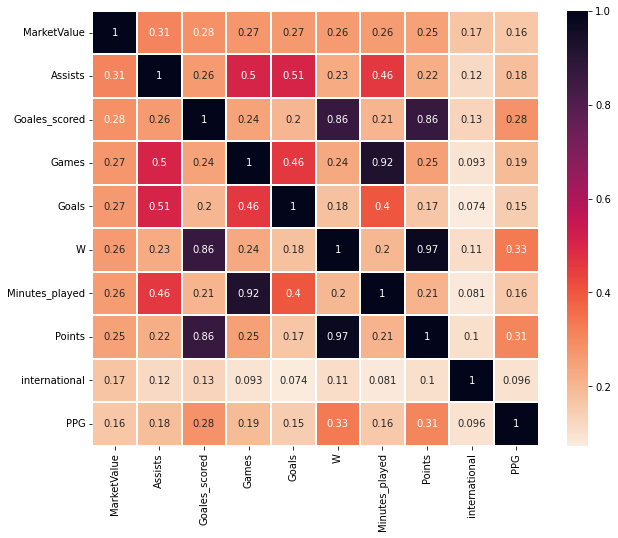

In [16]:
# plot the top 10 correlation matrix
corr = df.corr()
top10 = corr.nlargest(10, 'MarketValue')['MarketValue'].index
top10_corr = df[top10].corr()
sns.heatmap(top10_corr, annot=True, cmap='rocket_r', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

<AxesSubplot:>

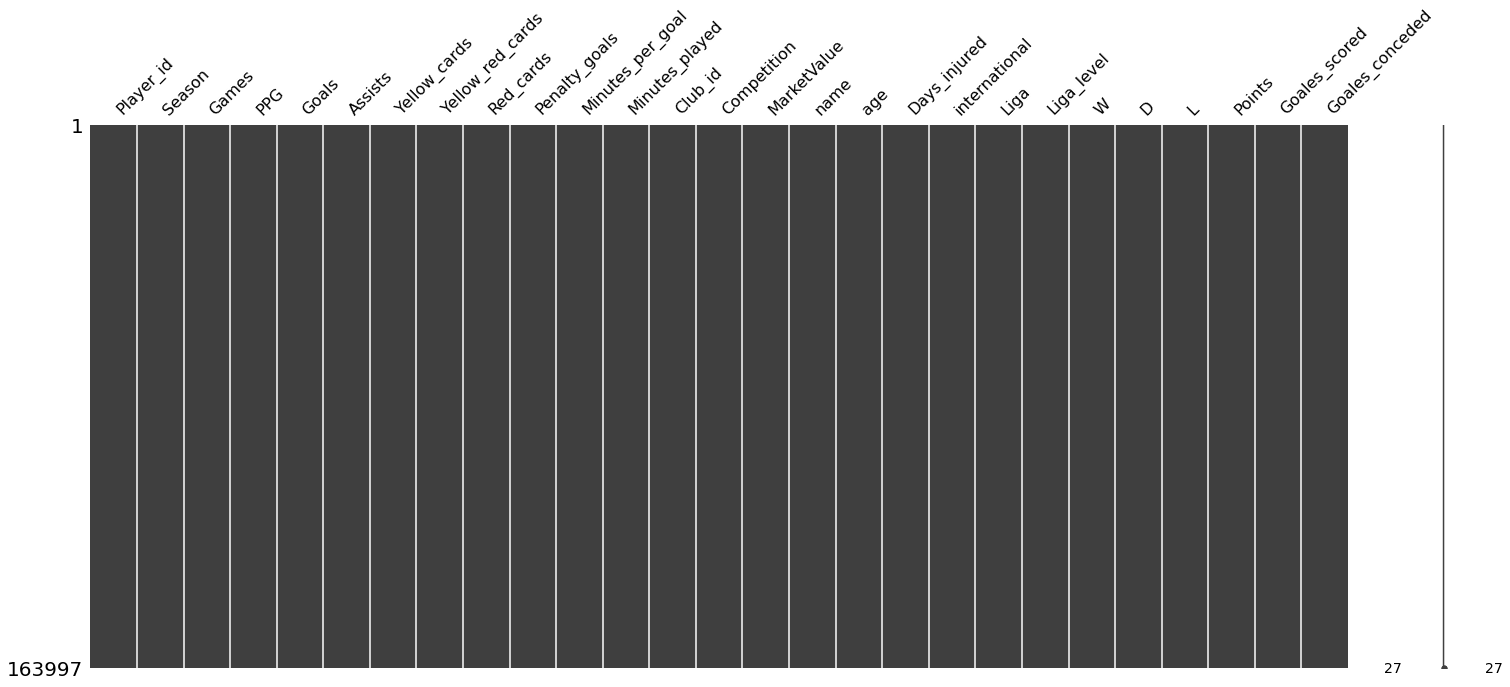

In [8]:
# use missingno to show missing values
msno.matrix(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163997 entries, 0 to 177002
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Player_id         163997 non-null  int64  
 1   Season            163997 non-null  int64  
 2   Games             163997 non-null  int64  
 3   PPG               163997 non-null  float64
 4   Goals             163997 non-null  int64  
 5   Assists           163997 non-null  int64  
 6   Yellow_cards      163997 non-null  int64  
 7   Yellow_red_cards  163997 non-null  int64  
 8   Red_cards         163997 non-null  int64  
 9   Penalty_goals     163997 non-null  int64  
 10  Minutes_per_goal  163997 non-null  float64
 11  Minutes_played    163997 non-null  int64  
 12  Club_id           163997 non-null  int64  
 13  Competition       163997 non-null  object 
 14  MarketValue       163997 non-null  int64  
 15  name              163997 non-null  object 
 16  age               16

In [10]:
df.Player_id.nunique()

23219